# EDA of MSE
- Updated 2023.05.09
- Written by shyeon

### Preparing to run the code

In [1]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

curr_path = Path().absolute()
os.chdir(curr_path.parent)  # change working directory to parent path

### Loading a dataframe containing evaluations of prediction performance
- value_df: (156232, 66)

In [2]:
mse_df = pd.read_pickle("data/evaluation/mse.pickle")
mse_df = mse_df.reset_index().drop(["index"], axis=1)
mse_df.head()

,num_xs,y,mse,relation,ranker,alpha,model
0,1,0,0.027915,corr_mat,pagerank,0.1,lgb
1,1,51,0.310882,corr_mat,pagerank,0.1,lgb
2,1,1,0.029614,corr_mat,pagerank,0.1,lgb
3,1,63,0.379330,corr_mat,pagerank,0.1,lgb
4,1,22,0.468471,corr_mat,pagerank,0.1,lgb


In [3]:
group_keys = ["ranker", "alpha", "num_xs", "model", "relation"]
mse_max = mse_df.groupby(by=group_keys).max()[["mse"]]
mse_max["method"] = "max"
mse_mean = mse_df.groupby(by=group_keys).mean()[["mse"]]
mse_mean["method"] = "mean"
mse_min = mse_df.groupby(by=group_keys).min()[["mse"]]
mse_min["method"] = "min"
mse_total = pd.concat([mse_mean, mse_max, mse_min])
mse_total = mse_total.reset_index()
mse_total["alpha"] = np.around(mse_total["alpha"], decimals=1)

mse_total.head()
mse_total.to_csv("mse_group.csv")

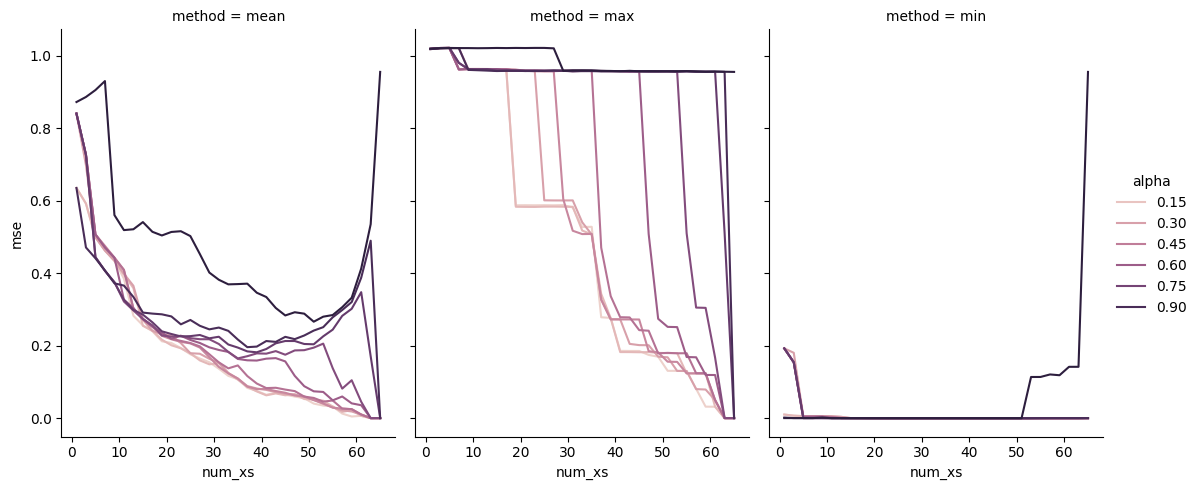

In [6]:
# Plot the lines on two facets
sns.relplot(
    data=mse_total[(mse_total["ranker"] == "radiorank") & (mse_total["relation"] == "lasso_mat") & (mse_total["model"] == "lgb")],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

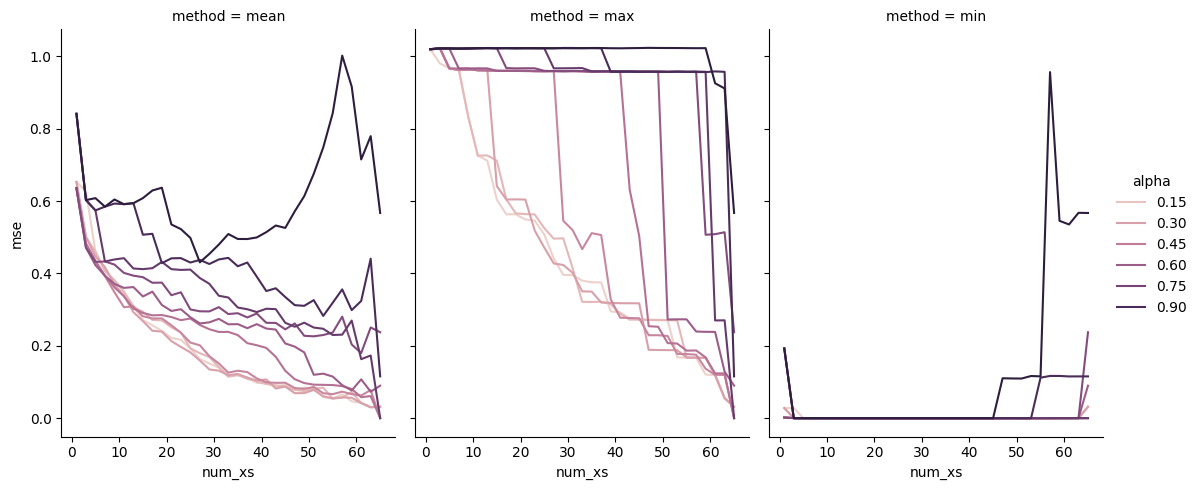

In [7]:
# Plot the lines on two facets
sns.relplot(
    data=mse_total[(mse_total["ranker"] == "radiorank") & (mse_total["relation"] == "corr_mat") & (mse_total["model"] == "lgb")],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

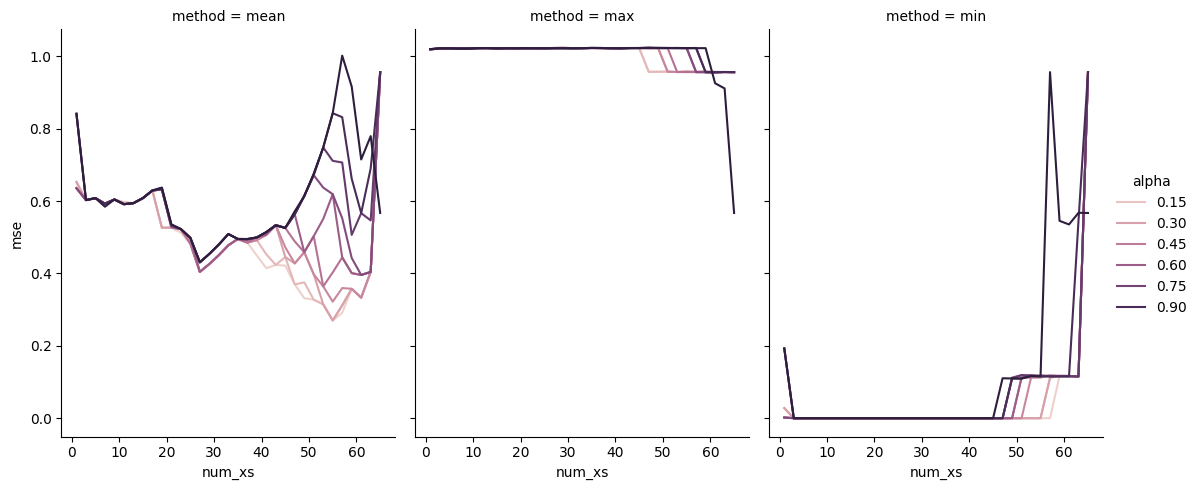

In [8]:
# Plot the lines on two facets
sns.relplot(
    data=mse_total[(mse_total["ranker"] == "pagerank") & (mse_total["relation"] == "corr_mat") & (mse_total["model"] == "lgb")],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

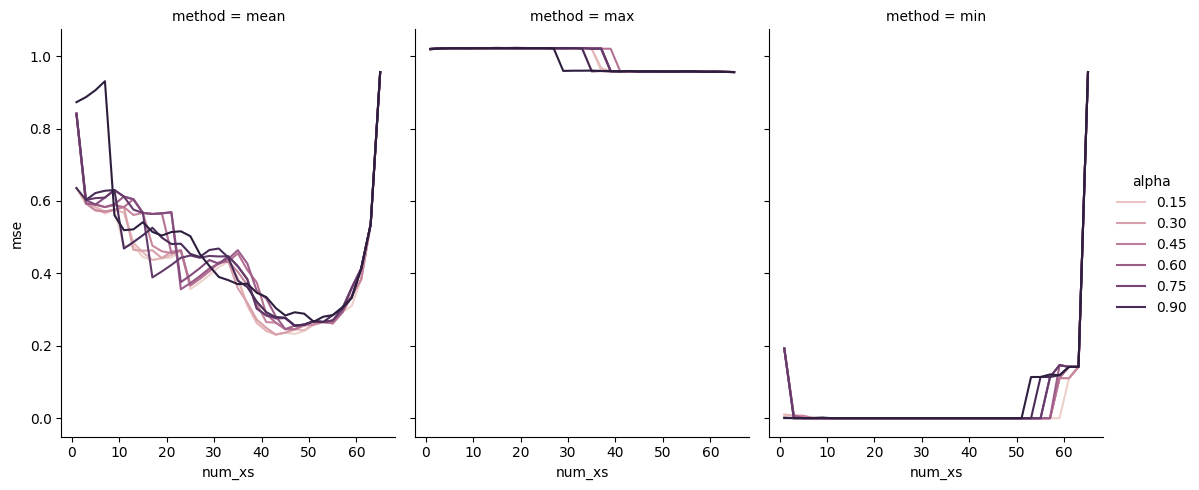

In [9]:
# Plot the lines on two facets
sns.relplot(
    data=mse_total[(mse_total["ranker"] == "pagerank") & (mse_total["relation"] == "lasso_mat") & (mse_total["model"] == "lgb")],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)